Dans ce notebook, je vous propose d'étudier une base de données portant sur les Pokemon et leurs capacités. J'y étudie leurs statistiques en fonction notamment de leur génération et de leur type.

In [2]:
import pandas as pd

lien = "https://gist.githubusercontent.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6/raw/92200bc0a673d5ce2110aaad4544ed6c4010f687/pokemon.csv"

fichier = pd.read_csv(lien)
fichier.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Génération

Dans cette partie, je m'intéresse à la distinction des Pokemon par génération, en commençant par le nombre de Pokemon par génération

In [3]:
fichier['Name']
f_nb_gen=fichier.groupby(by='Generation').count()
f_nb_gen

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Legendary
Generation,,,,,,,,,,,,
1,166,166,166,78,166,166,166,166,166,166,166,166
2,106,106,106,55,106,106,106,106,106,106,106,106
3,160,160,160,82,160,160,160,160,160,160,160,160
4,121,121,121,67,121,121,121,121,121,121,121,121
5,165,165,165,82,165,165,165,165,165,165,165,165
6,82,82,82,50,82,82,82,82,82,82,82,82


<AxesSubplot:title={'center':'Répartition du nombre de Pokemon en fonction de leur génération'}, ylabel='#'>

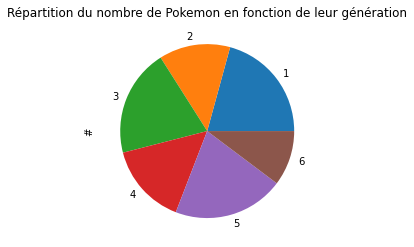

In [4]:
f_nb_gen['#'].plot(kind="pie",title='Répartition du nombre de Pokemon en fonction de leur génération')

In [5]:
f_nb_leg=fichier.groupby(by='Legendary').count()
print('Le nombre total de légendaires sur les 6 générations est',f_nb_leg['#'].iloc[1])

Le nombre total de légendaires sur les 6 générations est 65


# Meilleures statistiques par type

Dans cette partie, je fais ressortir les meilleurs statistiques, d'abord celles pour tous les Pokemon, puis je distingue les statistiques par type. 

In [6]:
#défense
def_max=fichier["Defense"].max()
pkm_def_max=fichier[fichier['Defense']==def_max]
print("Le pokémon avec la défense la plus élevée est",pkm_def_max["Name"].iloc[0])

Le pokémon avec la défense la plus élevée est SteelixMega Steelix


In [7]:
#attaque
atk_max=fichier["Attack"].max()
pkm_atk_max=fichier[fichier['Attack']==atk_max]
print("Le pokémon avec l'attaque la plus élevée est",pkm_atk_max["Name"].iloc[0])

Le pokémon avec l'attaque la plus élevée est MewtwoMega Mewtwo X


Désormais, je me penche sur la distinction des Pokemon par type . J'étudie leurs différences de statistiques (attaque, défense, vitesse) en fonction de leur premier type.

In [8]:
#je crée une dataframe qui donne une moyenne des statistiques défense, attaque, vitesse pour chaque type
f_type1_atk=fichier.groupby('Type 1')['Attack'].mean()
f_type1_def=fichier.groupby('Type 1')['Defense'].mean()
f_type1_speed=fichier.groupby('Type 1')['Speed'].mean()

In [9]:
#j'enregistre dans des listes les valeurs de ces moyennes par type pou rpouvoir les afficher sur un même graphe
types=f_type1_atk.keys()
n=len(types)

f_type1_atk_valeurs=[f_type1_atk.iloc[i] for i in range(n)]
f_type1_def_valeurs=[f_type1_def.iloc[i] for i in range(n)]
f_type1_speed_valeurs=[f_type1_speed.iloc[i] for i in range(n)]

list_types=[i for i in types]


<AxesSubplot:title={'center':'Statistiques moyennes par type'}>

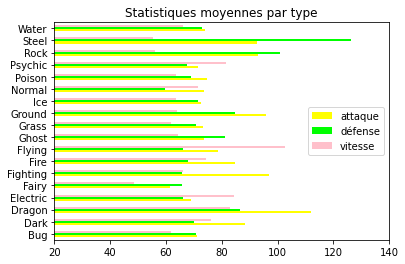

In [10]:
dico_atk_def={'attaque':f_type1_atk_valeurs,'défense':f_type1_def_valeurs,'vitesse':f_type1_speed_valeurs}
atk_def=pd.DataFrame(dico_atk_def,index=list_types)
atk_def.plot(kind='barh',xlim=(20,140),title='Statistiques moyennes par type',color=('yellow','lime','pink'))

# Catégories de vitesses

Enfin, je cherche à diviser les Pokemon en trois catégories en focntion de leur vitesse, qu'elle soit lente, rapide ou moyenne

In [11]:
#je cherche la vitesse minimale et maximale de tous les Pokemon pour la diviser en trois catégories régulièrement espacées
vitesse_min=fichier['Speed'].min()
vitesse_max=fichier['Speed'].max()

print('La vitesse minimale qu\'un Pokemon peut avoir est',vitesse_min)
print('La vitesse maximale est',vitesse_max)

vitesse_quartile1=int(vitesse_min+(vitesse_max-vitesse_min)/3)
vitesse_quartile3=int(vitesse_max-(vitesse_max-vitesse_min)/3)

La vitesse minimale qu'un Pokemon peut avoir est 5
La vitesse maximale est 180


In [12]:
#je divise les Pokemon en 3 catégories dans des listes
lent=[]
moyen=[]
rapide=[]

for i in range(len(fichier['#'])):
    if fichier['Speed'].iloc[i]<=vitesse_quartile1:
        lent.append(fichier['Name'].iloc[i])
    elif fichier['Speed'].iloc[i]>=vitesse_quartile3:
        rapide.append(fichier['Name'].iloc[i])
    else:
        moyen.append(fichier['Name'].iloc[i])

<AxesSubplot:title={'center':'Répartition du nombre de Pokemon en fonction de leur vitesse'}>

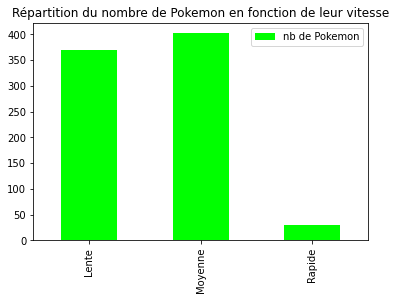

In [13]:
dico_speed={'nb de Pokemon':[len(lent),len(moyen),len(rapide)]}
df_vitesse=pd.DataFrame(dico_speed,index=['Lente','Moyenne','Rapide'])
df_vitesse.plot(kind='bar',title='Répartition du nombre de Pokemon en fonction de leur vitesse',color='lime')

# Conclusion

Pour constituer une équipe de Pokemon, il est très important de connaître leurs statistiques, que ce soit leur attaque, leur défense, leur vitesse ou encore leur type. Il est important de mélanger les types dans son équipe, d'une part, pour avoir les types qui affaiblissent au mieux les Pokemon de son adversaire, d'autre part, car les statistiques des Pokemon sont très variables en fonction de leur type. Ainsi, si les Pokemon de type acier ont la meilleure défense, les types Dragon ont la meilleure attaque. Enfin concernant la vitesse, les Pokemon de type vol sont de loin les plus rapides, et comme on peut le constater, les Pokemon sont essentiellement de vitesse moyenne ou lente, très peu d'entre eux sont en réalité rapides.